In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sweetviz as sv

%matplotlib inline

In [3]:
# !pip install sweetviz
# !pip install missingpy

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# os.chdir(r'/content/drive/MyDrive/higgs boson/')

In [6]:
pd.pandas.set_option('display.max_columns', None)

## Reading Data:

In [7]:
# For running in google colab:
# df = pd.read_csv(r'training.csv', na_values=-999.00)
# df_test = pd.read_csv(r'test.csv', na_values=-999.00)


# For reading Data from local system:
df = pd.read_csv(r'../data/raw/training.csv', na_values=-999.00)
df_test = pd.read_csv(r'../data/raw/test.csv', na_values=-999.00)

# Storing the event ids in variable
train_event_id, test_event_id = df['EventId'], df_test['EventId']

# Removing event ids from both dataframes
df.drop(columns='EventId', inplace=True)
df_test.drop(columns='EventId', inplace=True)

### Converting to categorical:

In [8]:
df.Label = df.Label.astype('category')

## Displaying data:

In [9]:
df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,125.157,0.879,1.414,NaN,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226,2.233584,b
2,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,197.814,3.776,1.414,NaN,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,2.347389,b
3,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,75.968,2.354,-1.285,NaN,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,5.446378,b
4,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,57.983,1.056,-1.385,NaN,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,6.245333,b


In [10]:
df_test.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,NaN,79.589,23.916,3.036,NaN,NaN,NaN,0.903,3.036,56.018,1.536,-1.404,NaN,22.088,-0.540,-0.609,33.930,-0.504,-1.511,48.509,2.022,98.556,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000
1,106.398,67.490,87.949,49.994,NaN,NaN,NaN,2.048,2.679,132.865,1.777,-1.204,NaN,30.716,-1.784,3.054,54.574,-0.169,1.795,21.093,-1.138,176.251,1,47.575,-0.553,-0.849,NaN,NaN,NaN,47.575
2,117.794,56.226,96.358,4.137,NaN,NaN,NaN,2.755,4.137,97.600,1.096,-1.408,NaN,46.564,-0.298,3.079,51.036,-0.548,0.336,19.461,-1.868,111.505,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
3,135.861,30.604,97.288,9.104,NaN,NaN,NaN,2.811,9.104,94.112,0.819,-1.382,NaN,51.741,0.388,-1.408,42.371,-0.295,2.148,25.131,1.172,164.707,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
4,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,721.552,1.713,-0.913,0.004,45.087,-1.548,1.877,77.252,-1.913,2.838,22.200,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


## Dropping Duplicates in train dataset if any:

In [11]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [12]:
df.shape

(250000, 32)

# Data exploration:

## Imbalenced or not?

**Slight Imbalance** An imbalanced classification problem where the distribution of examples is uneven by a small amount in the training dataset (e.g. 4:6)

In this case, the 2:1 imbalence is something that cannot be ignored. So lets try with both imbalenced & balenced data.

In [14]:
# Checking if target variable is imbalenced or not?
df.Label.value_counts()

b    164333
s     85667
Name: Label, dtype: int64

## info() & describe():

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   DER_mass_MMC                 211886 non-null  float64 
 1   DER_mass_transverse_met_lep  250000 non-null  float64 
 2   DER_mass_vis                 250000 non-null  float64 
 3   DER_pt_h                     250000 non-null  float64 
 4   DER_deltaeta_jet_jet         72543 non-null   float64 
 5   DER_mass_jet_jet             72543 non-null   float64 
 6   DER_prodeta_jet_jet          72543 non-null   float64 
 7   DER_deltar_tau_lep           250000 non-null  float64 
 8   DER_pt_tot                   250000 non-null  float64 
 9   DER_sum_pt                   250000 non-null  float64 
 10  DER_pt_ratio_lep_tau         250000 non-null  float64 
 11  DER_met_phi_centrality       250000 non-null  float64 
 12  DER_lep_eta_centrality       72543 non-null 

In [16]:
df.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,211886.000000,250000.000000,250000.000000,250000.000000,72543.000000,72543.000000,72543.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,72543.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,150087.000000,150087.000000,150087.000000,72543.000000,72543.000000,72543.000000,250000.000000,250000.000000
mean,121.858528,49.239819,81.181982,57.895962,2.403735,371.783360,-0.821688,2.373100,18.917332,158.432217,1.437609,-0.128305,0.458290,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,73.064591,1.646767
std,57.298157,35.344886,40.828691,63.655682,1.742226,397.699325,3.584362,0.782911,22.273494,115.706115,0.844743,1.193585,0.398681,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,60.662276,1.784546,1.813385,31.985782,2.031743,1.816950,98.015662,1.875103
min,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-18.066000,0.208000,0.000000,46.104000,0.047000,-1.414000,0.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,30.000000,-4.500000,-3.142000,0.000000,0.001502
25%,91.885250,19.241000,59.388750,14.068750,0.882500,111.977000,-2.629000,1.810000,2.841000,77.550000,0.883000,-1.371000,0.004000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,44.422500,-1.342000,-1.584000,37.312000,-1.612000,-1.576500,0.000000,0.018636
50%,112.406000,46.524000,73.752000,38.467500,2.107000,225.885000,-0.244000,2.491500,12.315500,120.664500,1.280000,-0.356000,0.454000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,65.561000,0.000000,-0.033000,47.902000,-0.010000,-0.002000,40.512500,1.156188
75%,135.482000,73.598000,92.259000,79.169000,3.690000,478.226000,0.958000,2.961000,27.591000,200.478250,1.777000,1.225000,0.879000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,103.342000,1.336000,1.562000,66.637000,1.589500,1.576000,109.933750,2.404128
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [17]:
# Finding shape of training
print('train -', df.shape)

# Finding shape of test
print('test -', df_test.shape)

train - (250000, 32)
test - (550000, 30)


In [18]:
# [(i, df[i].isnull().sum()/len(df[i])) for i in df.columns]

###  O/P Columns:

In [19]:
# Finding the 2 extra columns in the train dataset:
set(df.columns) - set(df_test.columns)

{'Label', 'Weight'}

### Heatmap contruction:

<AxesSubplot:>

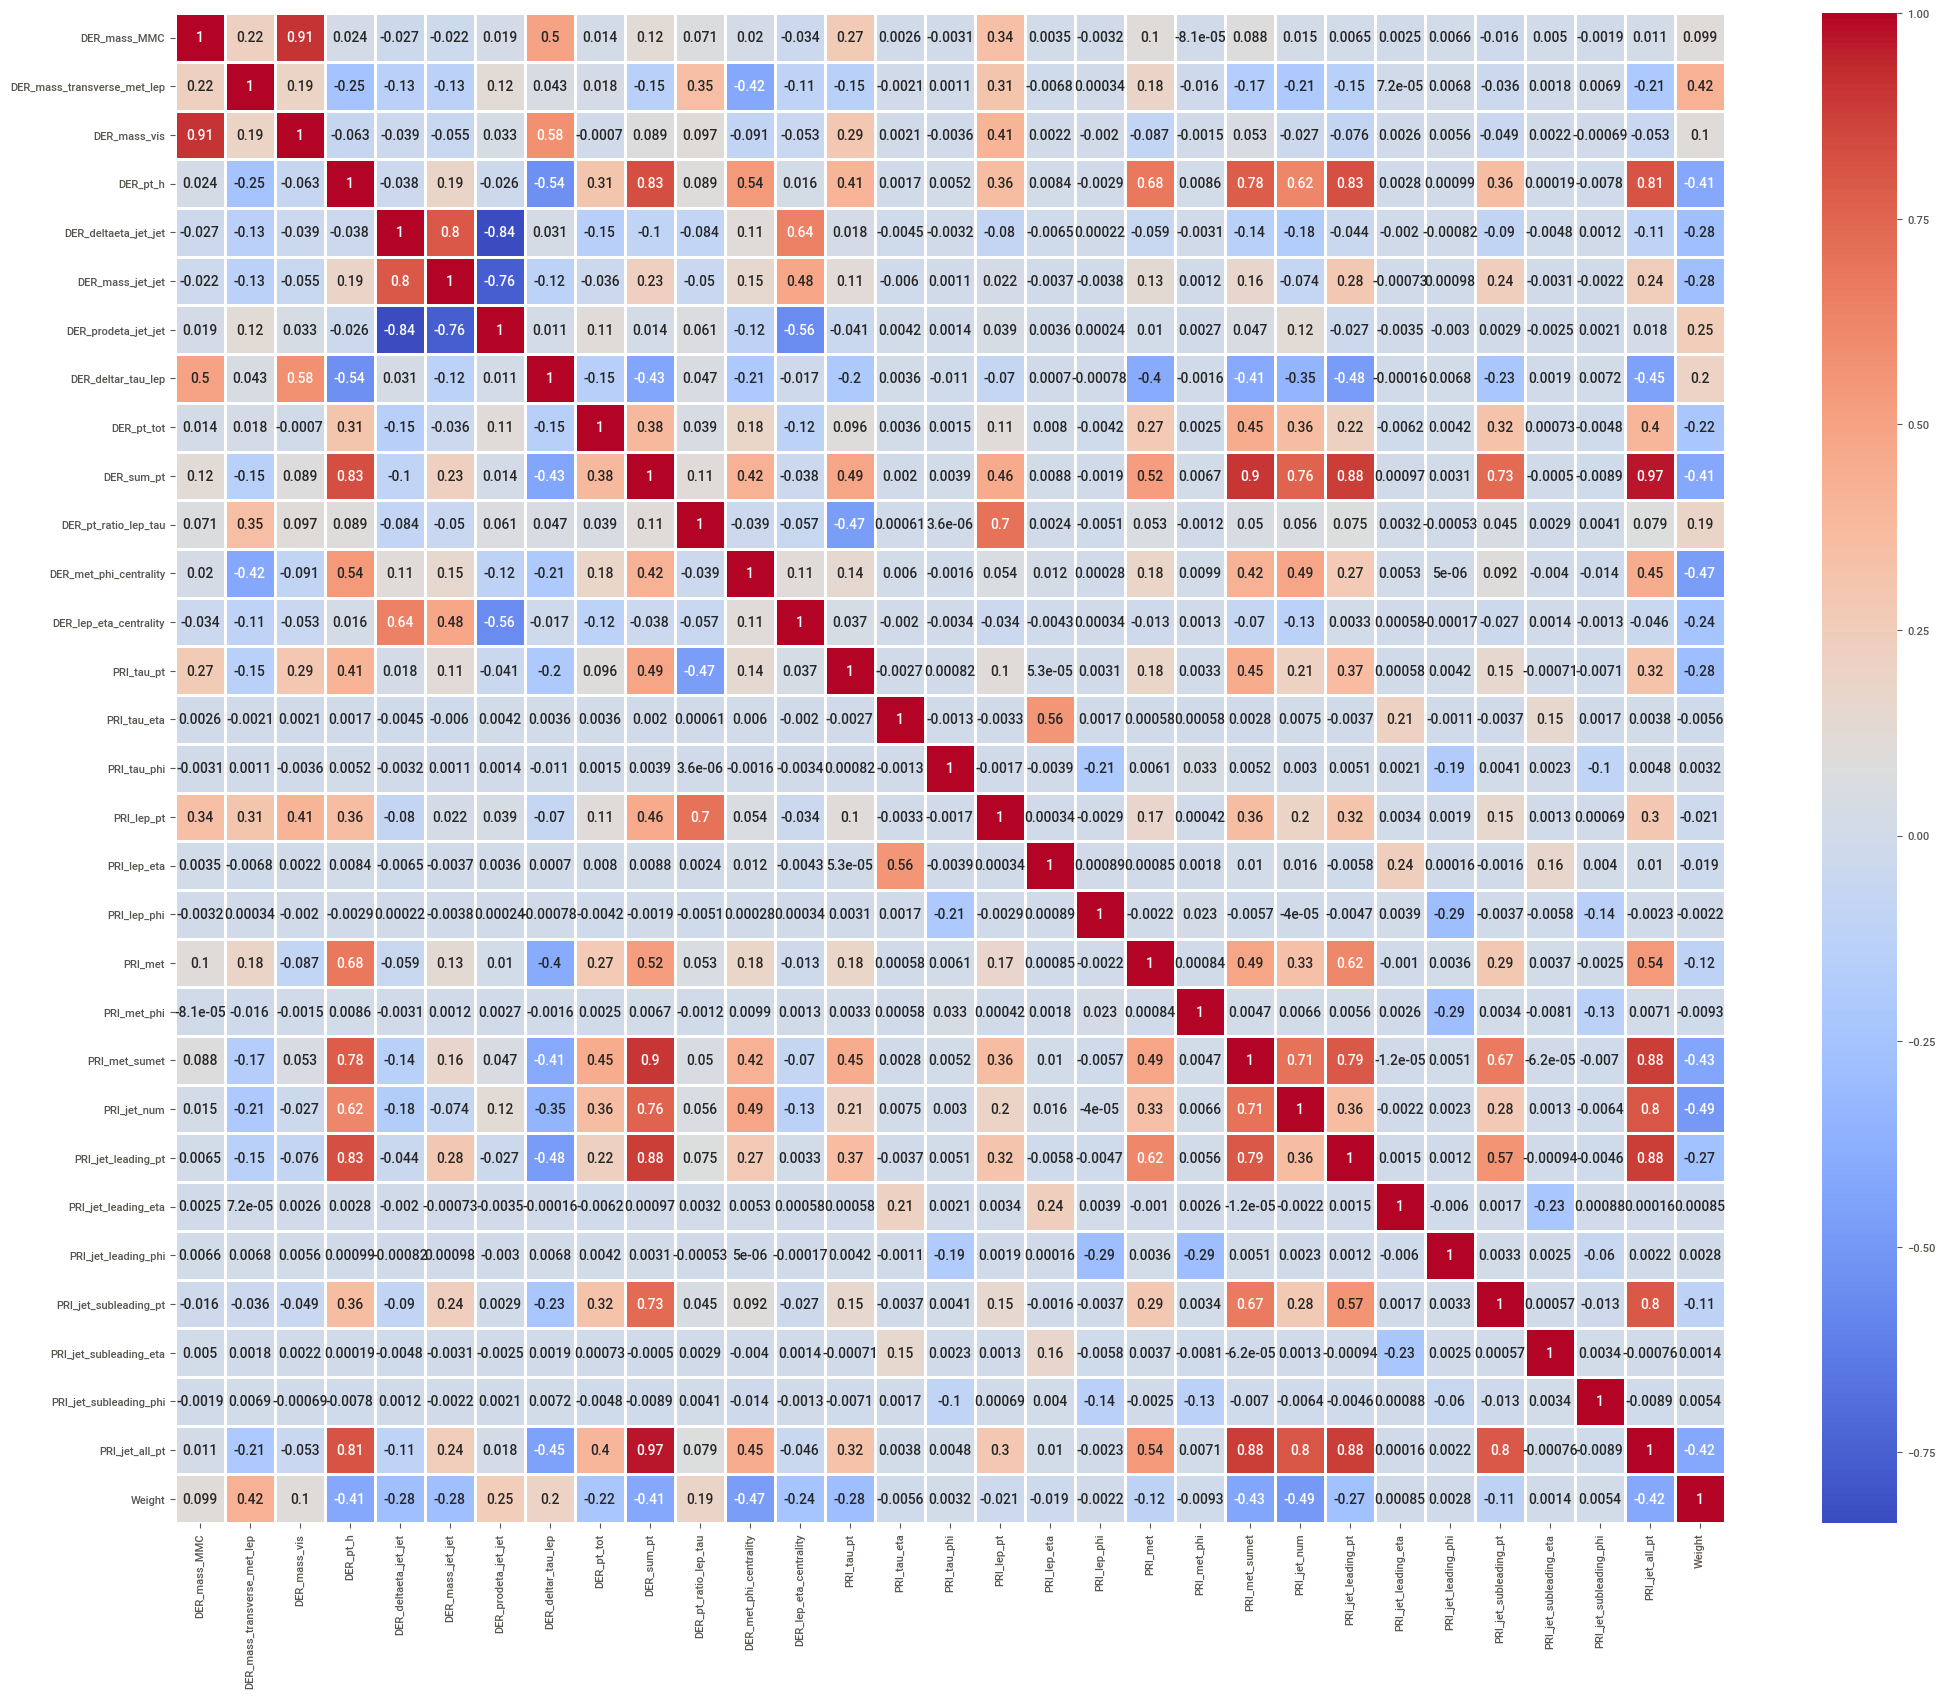

In [20]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidth=1)

### Finding rows with 70% null data:

In [22]:
df.count()

DER_mass_MMC                   211886
DER_mass_transverse_met_lep    250000
DER_mass_vis                   250000
DER_pt_h                       250000
DER_deltaeta_jet_jet            72543
DER_mass_jet_jet                72543
DER_prodeta_jet_jet             72543
DER_deltar_tau_lep             250000
DER_pt_tot                     250000
DER_sum_pt                     250000
DER_pt_ratio_lep_tau           250000
DER_met_phi_centrality         250000
DER_lep_eta_centrality          72543
PRI_tau_pt                     250000
PRI_tau_eta                    250000
PRI_tau_phi                    250000
PRI_lep_pt                     250000
PRI_lep_eta                    250000
PRI_lep_phi                    250000
PRI_met                        250000
PRI_met_phi                    250000
PRI_met_sumet                  250000
PRI_jet_num                    250000
PRI_jet_leading_pt             150087
PRI_jet_leading_eta            150087
PRI_jet_leading_phi            150087
PRI_jet_subl

In [23]:
# Finding all columns in train with NAN values:
col_cnt = df.count()

null_train = col_cnt[col_cnt/col_cnt.max()*100 < 30]
null_train.index

Index(['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
       'DER_lep_eta_centrality', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi'],
      dtype='object')

In [24]:
# Finding all columns in test with NAN values:
col_cnt_test = df_test.count()

null_test = col_cnt_test[col_cnt_test/col_cnt_test.max()*100 < 30][:-2]
null_test.index

Index(['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
       'DER_lep_eta_centrality', 'PRI_jet_subleading_pt'],
      dtype='object')

In [25]:
#  null_train & null_test columns
null_mismatch = set(null_train.index) - set(null_test.index)
null_mismatch

{'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi'}

In [26]:
null_union = set(null_train.index).union(set(null_test.index))
null_union

{'DER_deltaeta_jet_jet',
 'DER_lep_eta_centrality',
 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi',
 'PRI_jet_subleading_pt'}

## Checking correlation of null columns:

<AxesSubplot:>

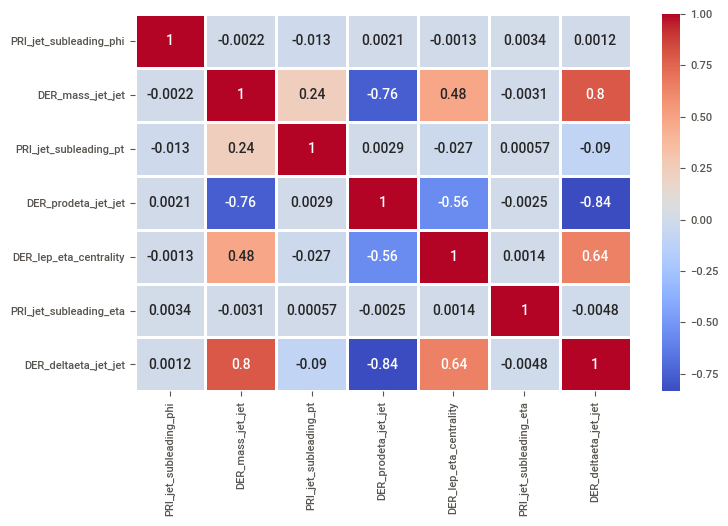

In [27]:
plt.figure(figsize=(8,5))
sns.heatmap(df[null_union].corr(), cmap='coolwarm', annot=True, linewidth=2)

In [28]:
df[null_union].describe()

,PRI_jet_subleading_phi,DER_mass_jet_jet,PRI_jet_subleading_pt,DER_prodeta_jet_jet,DER_lep_eta_centrality,PRI_jet_subleading_eta,DER_deltaeta_jet_jet
count,72543.000000,72543.000000,72543.000000,72543.000000,72543.000000,72543.000000,72543.000000
mean,-0.001582,371.783360,57.679474,-0.821688,0.458290,-0.011845,2.403735
std,1.816950,397.699325,31.985782,3.584362,0.398681,2.031743,1.742226
min,-3.142000,13.602000,30.000000,-18.066000,0.000000,-4.500000,0.000000
25%,-1.576500,111.977000,37.312000,-2.629000,0.004000,-1.612000,0.882500
50%,-0.002000,225.885000,47.902000,-0.244000,0.454000,-0.010000,2.107000
75%,1.576000,478.226000,66.637000,0.958000,0.879000,1.589500,3.690000
max,3.142000,4974.979000,721.456000,16.690000,1.000000,4.500000,8.503000


## Vizualising Data columns:

In [13]:
#EDA using Autoviz
sweet_report = sv.analyze(df)

#Saving results to HTML file
# sweet_report.show_html("/content/drive/MyDrive/HR Analytics EDA Analysis/output_sweetViz.html")  // for drive
sweet_report.show_html("../reports/output_sweetViz.html")

                                             |                                             | [  0%]   00:00 ->…

Report ../reports/output_sweetViz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [56]:
def generate_viz(colm, hue, bins):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    sns.histplot(data=df, x=colm, hue=hue, bins=bins)
    plt.title('HistPlot -- '+colm)
    
    plt.subplot(122)
    sns.boxplot(data=df, y=colm, x=hue)
    plt.title('BoxPlot -- '+colm)
    
def percent_null(colm, factor, cls='both'):    
    if cls == 'both':
        df1 = df
    else:
        df1 = df[df['Label'] == cls]
        
    q1 = round(df1[colm].quantile(0.25), 4)
    q3 = round(df1[colm].quantile(0.75), 4)
    iqr = q3 - q1
    r1 = max(0, q1 - (factor*iqr))
    r2 = q3 + (factor*iqr)


    # Outlier dataframe for s:
    outlier_cls = df1[(df1[colm] < r1) | (df1[colm] > r2)]


    # Temporary variables for printing:
    t1, t2 =len(outlier_cls), len(df1)
    t3 = round(t1/t2*100, 3)
    
    print('This is for label {}: \nq1 = {}, q3 = {}\nIQR = {} \nr1, r2 = {}, {}'.format(cls, q1, q3, iqr,r1, r2))
    print('{0} outliers out of {1} data points.\nPercent = {2}%\n\n'.format(t1, t2, t3))
    
    
    
def call_perc_null(colm, factor=1.5, bins='auto', hue = 'Label'):
    print('Factor =', factor,'\n')
    percent_null(colm, factor, 's')
    percent_null(colm, factor, 'b')
    percent_null(colm, factor, 'both')
    print('mean = {}, std = {} \nnull_count = {}, not_null = {}'.format(df[colm].mean(), df[colm].std(),
                                                                    df[colm].isnull().sum(), df[colm].count()))

    generate_viz(colm, hue, bins)

## Visualizing missing Data:

### Analysing: DER_mass_MMC (211886 records)

Factor = 1.5 

This is for label s: 
q1 = 107.316, q3 = 135.2782
IQR = 27.962199999999996 
r1, r2 = 65.37270000000001, 177.2215
1644 outliers out of 85667 data points.
Percent = 1.919%


This is for label b: 
q1 = 84.171, q3 = 135.9412
IQR = 51.7702 
r1, r2 = 6.515699999999995, 213.59650000000002
10129 outliers out of 164333 data points.
Percent = 6.164%


This is for label both: 
q1 = 91.8852, q3 = 135.482
IQR = 43.5968 
r1, r2 = 26.489999999999995, 200.87720000000002
13464 outliers out of 250000 data points.
Percent = 5.386%


mean = 121.8585283595896, std = 57.298156659856055 
null_count = 38114, not_null = 211886


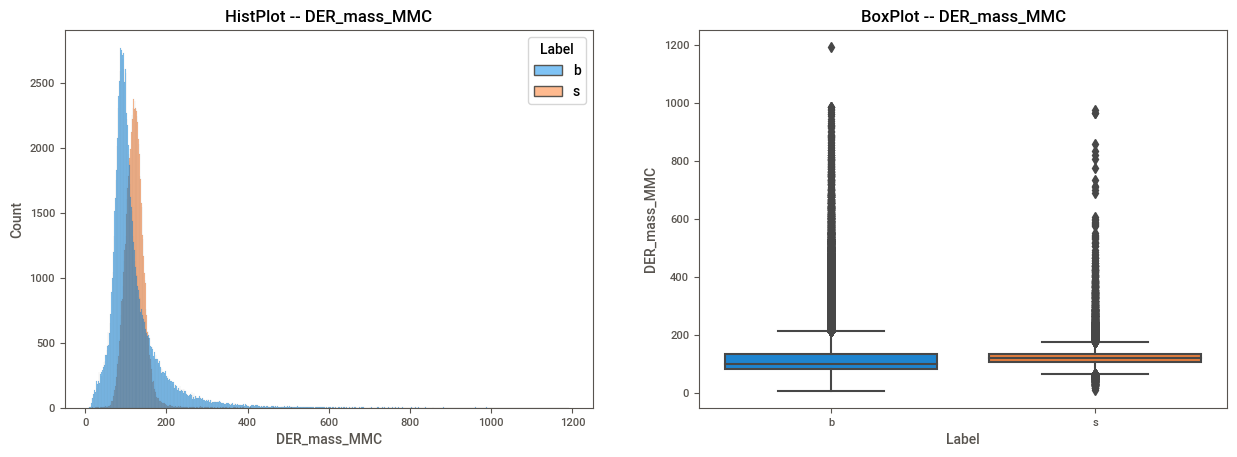

In [52]:
call_perc_null('DER_mass_MMC')

### Analysing: DER_deltaeta_jet_jet (72543 records)

Factor = 1.5 

This is for label s: 
q1 = 1.193, q3 = 4.558
IQR = 3.3649999999999998 
r1, r2 = 0, 9.6055
0 outliers out of 85667 data points.
Percent = 0.0%


This is for label b: 
q1 = 0.758, q3 = 2.7518
IQR = 1.9937999999999998 
r1, r2 = 0, 5.7425
298 outliers out of 164333 data points.
Percent = 0.181%


This is for label both: 
q1 = 0.8825, q3 = 3.69
IQR = 2.8075 
r1, r2 = 0, 7.901249999999999
27 outliers out of 250000 data points.
Percent = 0.011%


mean = 2.403735026122438, std = 1.7422263154395707 
null_count = 177457, not_null = 72543


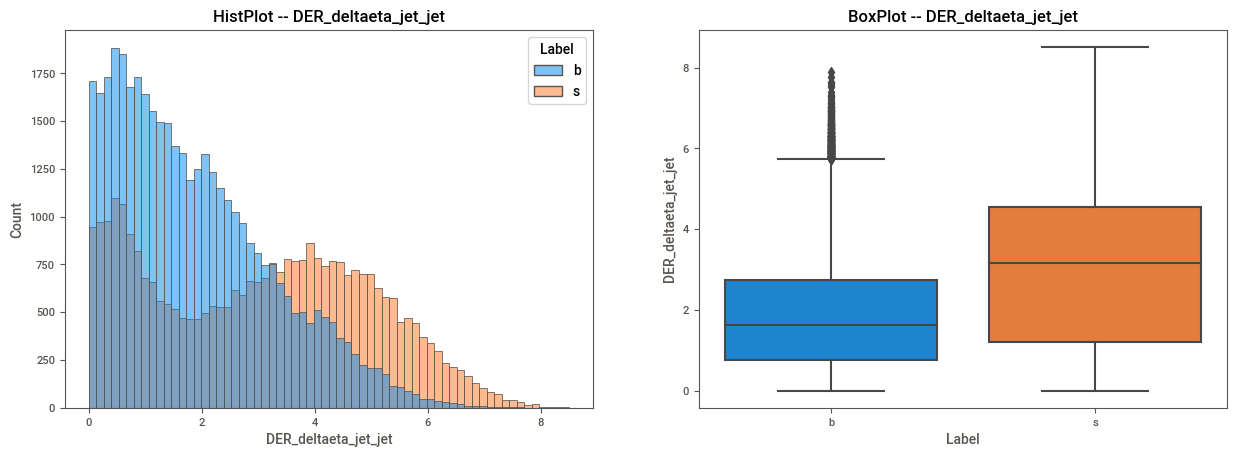

In [31]:
call_perc_null('DER_deltaeta_jet_jet')

### Analysing: DER_mass_jet_jet

Factor = 1.5 

This is for label s: 
q1 = 129.042, q3 = 722.186
IQR = 593.144 
r1, r2 = 0, 1611.902
1376 outliers out of 85667 data points.
Percent = 1.606%


This is for label b: 
q1 = 106.6722, q3 = 323.6623
IQR = 216.9901 
r1, r2 = 0, 649.14745
2701 outliers out of 164333 data points.
Percent = 1.644%


This is for label both: 
q1 = 111.977, q3 = 478.226
IQR = 366.249 
r1, r2 = 0, 1027.5995
5127 outliers out of 250000 data points.
Percent = 2.051%


mean = 371.7833604482857, std = 397.6993254755836 
null_count = 177457, not_null = 72543


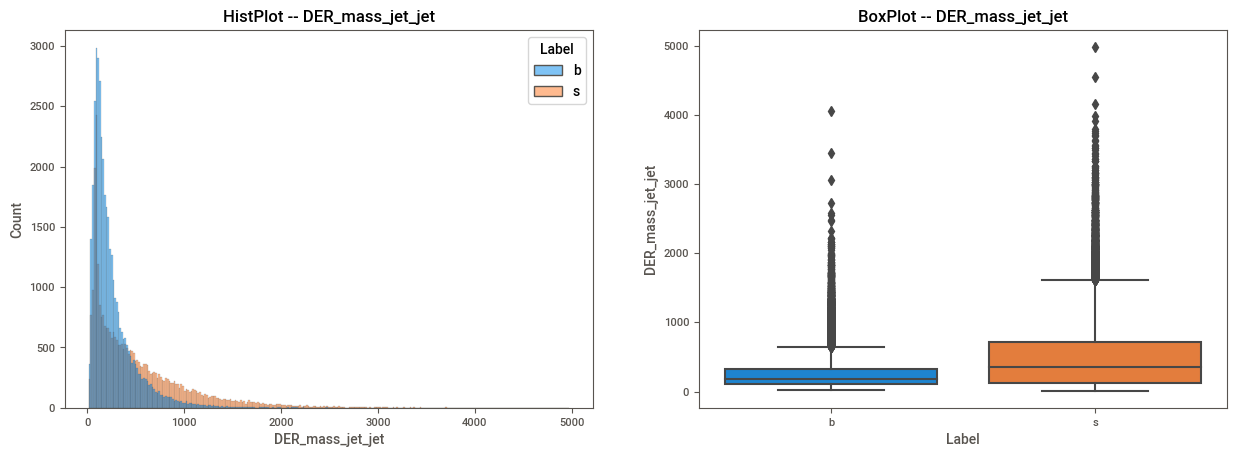

In [32]:
call_perc_null('DER_mass_jet_jet')

### Analysing: DER_prodeta_jet_jet

Factor = 1.5 

This is for label s: 
q1 = -4.593, q3 = 0.435
IQR = 5.028 
r1, r2 = 0, 7.976999999999999
22206 outliers out of 85667 data points.
Percent = 25.921%


This is for label b: 
q1 = -1.1008, q3 = 1.3028
IQR = 2.4036 
r1, r2 = 0, 4.9082
21470 outliers out of 164333 data points.
Percent = 13.065%


This is for label both: 
q1 = -2.629, q3 = 0.958
IQR = 3.5869999999999997 
r1, r2 = 0, 6.3385
43039 outliers out of 250000 data points.
Percent = 17.216%


mean = -0.8216881711536606, std = 3.584362015546407 
null_count = 177457, not_null = 72543


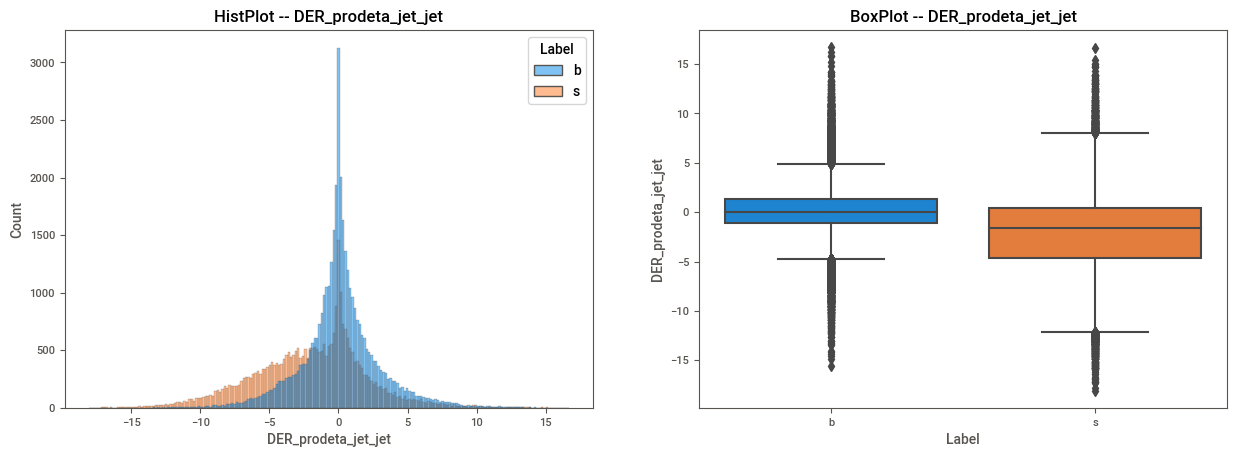

In [33]:
call_perc_null('DER_prodeta_jet_jet')

### Analysing: DER_lep_eta_centrality

Factor = 1.5 

This is for label s: 
q1 = 0.155, q3 = 0.948
IQR = 0.7929999999999999 
r1, r2 = 0, 2.1374999999999997
0 outliers out of 85667 data points.
Percent = 0.0%


This is for label b: 
q1 = 0.0, q3 = 0.71
IQR = 0.71 
r1, r2 = 0, 1.775
0 outliers out of 164333 data points.
Percent = 0.0%


This is for label both: 
q1 = 0.004, q3 = 0.879
IQR = 0.875 
r1, r2 = 0, 2.1915
0 outliers out of 250000 data points.
Percent = 0.0%


mean = 0.4582898005320983, std = 0.39868135412138095 
null_count = 177457, not_null = 72543


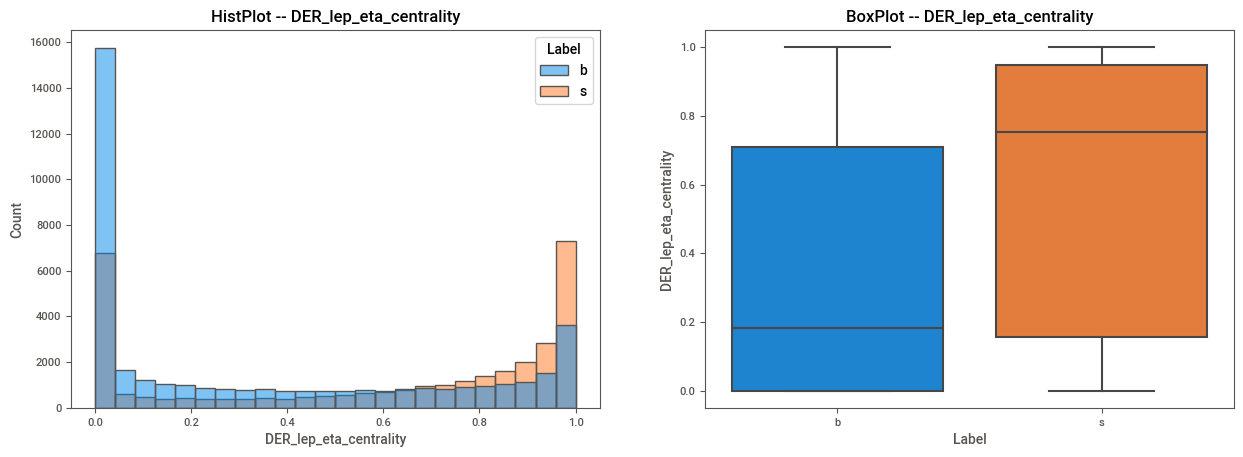

In [35]:
call_perc_null('DER_lep_eta_centrality')

### Analysing: PRI_jet_subleading_pt

Factor = 1.5 

This is for label s: 
q1 = 37.8, q3 = 66.802
IQR = 29.00200000000001 
r1, r2 = 0, 110.30500000000002
1627 outliers out of 85667 data points.
Percent = 1.899%


This is for label b: 
q1 = 36.97, q3 = 66.477
IQR = 29.507000000000005 
r1, r2 = 0, 110.73750000000001
2683 outliers out of 164333 data points.
Percent = 1.633%


This is for label both: 
q1 = 37.312, q3 = 66.637
IQR = 29.325000000000003 
r1, r2 = 0, 110.62450000000001
4296 outliers out of 250000 data points.
Percent = 1.718%


mean = 57.67947442206691, std = 31.98578167863564 
null_count = 177457, not_null = 72543


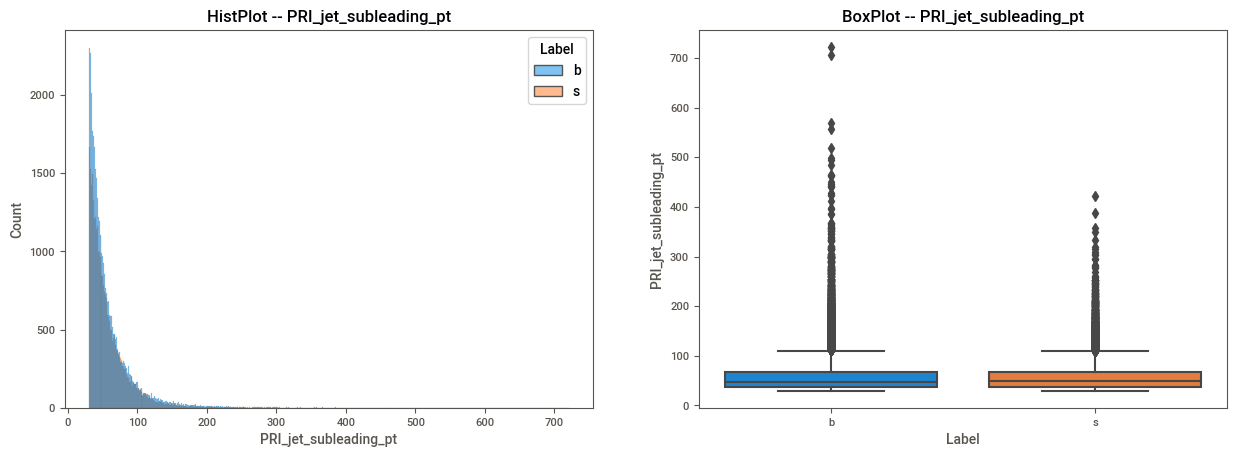

In [36]:
call_perc_null('PRI_jet_subleading_pt')

In [37]:
# plt.figure(figsize=(20, 7))
# sns.histplot(data=df, x='PRI_jet_subleading_pt', hue='Label', bins=100)

### Analysing: PRI_jet_subleading_eta

Factor = 1.5 

This is for label s: 
q1 = -1.997, q3 = 1.976
IQR = 3.973 
r1, r2 = 0, 7.9355
16216 outliers out of 85667 data points.
Percent = 18.929%


This is for label b: 
q1 = -1.336, q3 = 1.3127
IQR = 2.6487 
r1, r2 = 0, 5.28575
20158 outliers out of 164333 data points.
Percent = 12.267%


This is for label both: 
q1 = -1.612, q3 = 1.5895
IQR = 3.2015000000000002 
r1, r2 = 0, 6.391750000000001
36374 outliers out of 250000 data points.
Percent = 14.55%


mean = -0.01184526418813669, std = 2.0317426007427026 
null_count = 177457, not_null = 72543


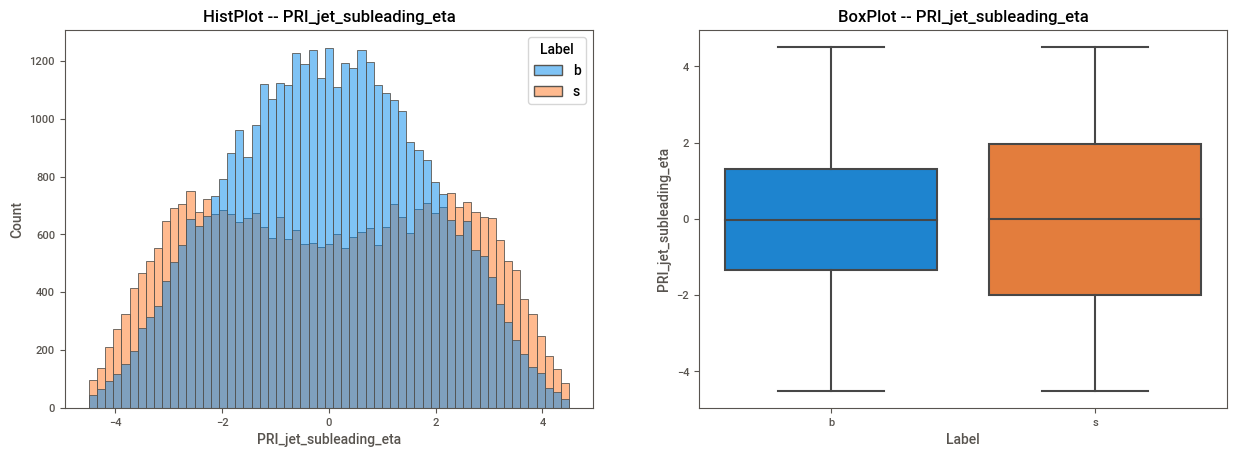

In [38]:
call_perc_null('PRI_jet_subleading_eta')

### Analysing: PRI_jet_subleading_phi

Factor = 1.5 

This is for label s: 
q1 = -1.587, q3 = 1.558
IQR = 3.145 
r1, r2 = 0, 6.2755
16345 outliers out of 85667 data points.
Percent = 19.08%


This is for label b: 
q1 = -1.568, q3 = 1.592
IQR = 3.16 
r1, r2 = 0, 6.332000000000001
19941 outliers out of 164333 data points.
Percent = 12.135%


This is for label both: 
q1 = -1.5765, q3 = 1.576
IQR = 3.1525 
r1, r2 = 0, 6.30475
36286 outliers out of 250000 data points.
Percent = 14.514%


mean = -0.0015822891250706472, std = 1.8169497260372027 
null_count = 177457, not_null = 72543


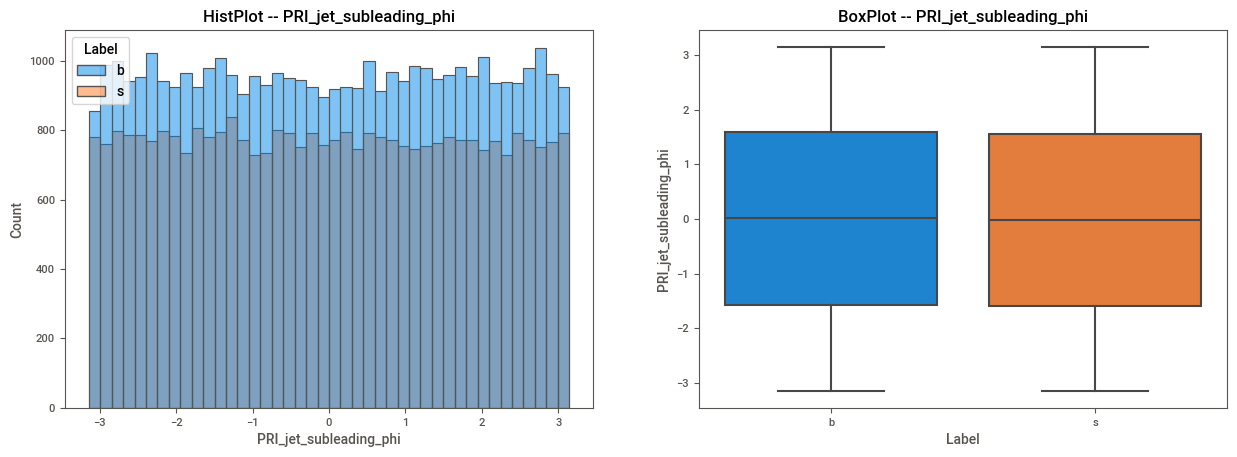

In [39]:
call_perc_null('PRI_jet_subleading_phi')

## Imputing Missing Data:

In [107]:
# Dividing Datframe:
X_train, y_train = df.drop(columns=['Weight', 'Label']), df[['Weight', 'Label']]
X_test= df_test

### Simple Imputer (Mean):

In [108]:
from sklearn.impute import SimpleImputer

In [109]:
si = SimpleImputer()

# Training Set
temp = si.fit_transform(X_train)
train_temp = pd.DataFrame(temp, columns=X_train.columns)

# Test Set
temp = si.transform(X_test)
test_temp = pd.DataFrame(temp, columns=X_test.columns)

In [110]:
## Saving Dataframes
train_temp.to_csv('../data/interim/train_SimpleImputer_mean.csv', index=False)
test_temp.to_csv('../data/interim/test_SimpleImputer_mean.csv', index=False)

In [111]:
# Deleting temporary variable
del temp, train_temp, test_temp

### Simple Imputer (Median):

In [114]:
si = SimpleImputer(strategy='median')

# Training Set
temp = si.fit_transform(X_train)
train_temp = pd.DataFrame(temp, columns=X_train.columns)

# Test Set
temp = si.transform(X_test)
test_temp = pd.DataFrame(temp, columns=X_test.columns)

In [115]:
## Saving Dataframes
train_temp.to_csv('../data/interim/train_SimpleImputer_median.csv', index=False)
test_temp.to_csv('../data/interim/test_SimpleImputer_median.csv', index=False)

In [116]:
# Deleting temporary variable
del temp, train_temp, test_temp

### Imputation wrt Label Category (Median):

**This won't work as test set dosemt have the category `Label`**. 

Still i am implementing it on the training set for completeness.

In [151]:
medb = df[df['Label'] == 'b'].median()
meds = df[df['Label'] == 's'].median()

In [157]:
# For Training Set
temp1 = df[df['Label'] == 'b'].fillna(medb)
temp2 = df[df['Label'] == 's'].fillna(meds)
df1 = pd.concat([temp1, temp2], axis=0)
df1.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
1,160.937,68.768,103.235,48.146,1.618,181.060,0.032,3.473,2.078,125.157,0.879,1.414,0.181,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,47.379,-0.015,0.016,46.226,2.233584,b
2,102.078,162.172,125.953,35.635,1.618,181.060,0.032,3.148,9.336,197.814,3.776,1.414,0.181,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,47.379,-0.015,0.016,44.251,2.347389,b
3,143.905,81.417,80.943,0.414,1.618,181.060,0.032,3.310,0.414,75.968,2.354,-1.285,0.181,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,60.058,0.002,-0.031,47.379,-0.015,0.016,-0.000,5.446378,b
4,175.864,16.915,134.805,16.405,1.618,181.060,0.032,3.891,16.405,57.983,1.056,-1.385,0.181,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,60.058,0.002,-0.031,47.379,-0.015,0.016,0.000,6.245333,b
5,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.083414,b


In [158]:
# Note: If you wish to shuffle your dataframe in-place and reset the index, you can do:

df1 = df1.sample(frac=1).reset_index(drop=True)
df1.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,82.706,24.701,58.574,67.759,1.618,181.060,0.032,1.729,17.031,122.853,0.842,1.264,0.181,39.028,-0.018,2.438,32.858,0.877,-2.366,15.235,2.748,242.230,1,50.967,2.506,-0.071,47.379,-0.015,0.016,50.967,0.071357,b
1,92.554,34.176,67.540,1.370,3.150,355.086,-1.554,3.055,1.370,67.530,1.228,-1.393,0.752,30.316,-1.250,-0.827,37.214,-1.471,2.220,7.938,-1.137,64.858,0,74.422,-0.005,-0.036,48.607,0.005,-0.024,0.000,0.018636,s
2,45.220,64.763,35.828,31.398,1.618,181.060,0.032,1.243,9.045,97.178,1.548,-0.930,0.181,24.669,-1.508,2.206,38.181,-1.658,0.972,27.492,-2.234,136.413,1,34.328,2.354,-1.506,47.379,-0.015,0.016,34.328,2.050901,b
3,69.374,60.880,57.258,34.372,1.618,181.060,0.032,1.755,4.535,96.670,1.691,-1.379,0.181,22.639,0.312,-2.106,38.284,-1.356,-2.649,24.468,0.701,152.460,1,35.747,-1.281,0.810,47.379,-0.015,0.016,35.747,2.566991,b
4,107.081,26.399,80.137,2.229,3.150,355.086,-1.554,2.952,2.229,80.436,1.064,-1.414,0.752,38.978,1.739,1.261,41.458,1.641,-1.690,7.445,2.894,116.681,0,74.422,-0.005,-0.036,48.607,0.005,-0.024,0.000,0.001503,s


### KNN Imputer:

In [133]:
from sklearn.impute import KNNImputer

In [144]:
## KNN Imputer cannot handle categorical variables
num = [col for col in X_train.columns if X_train[col].dtypes != 'O']

30

In [159]:
knn_impute = KNNImputer(n_neighbors=5, weights='distance', copy=True)
knn_impute.fit(X_train[num])

# train_temp = knn_impute.transform(X_train[num])

KNNImputer(weights='distance')

### MissForest:

In [167]:
## Uncomment on getting sklearn.neighbors.base error while importing missingpy:

# import sklearn.neighbors._base
# import sys
# sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base


from missingpy import MissForest

In [165]:
%%timeit

# Make an instance and perform the imputation
imputer = MissForest()

# X_imputed = imputer.fit_transform(X_train)

4.99 µs ± 970 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
